In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loc1 = pd.read_csv('./dataset/Location1.csv')

In [3]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [4]:
loc1.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [5]:
loc1['Time'] = pd.to_datetime(loc1['Time'])
loc1['Year']=loc1['Time'].dt.year
loc1['Month']=loc1['Time'].dt.month

In [6]:
loc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 43800 non-null  datetime64[ns]
 1   temperature_2m       43800 non-null  float64       
 2   relativehumidity_2m  43800 non-null  int64         
 3   dewpoint_2m          43800 non-null  float64       
 4   windspeed_10m        43800 non-null  float64       
 5   windspeed_100m       43800 non-null  float64       
 6   winddirection_10m    43800 non-null  int64         
 7   winddirection_100m   43800 non-null  int64         
 8   windgusts_10m        43800 non-null  float64       
 9   Power                43800 non-null  float64       
 10  Year                 43800 non-null  int32         
 11  Month                43800 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(3)
memory usage: 3.7 MB


In [7]:
loc1['Hour'] = loc1['Time'].dt.hour
loc1.head(2)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Hour
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1


In [8]:
min_year = loc1['Year'].min()
max_year = loc1['Year'].max()
loc1['Month_sin'] = np.sin(2 * np.pi * loc1['Month'] / 12)
loc1['Month_cos'] = np.cos(2 * np.pi * loc1['Month'] / 12)


loc1['Year_sin'] = np.sin(2 * np.pi * (loc1['Year'] - min_year) / (max_year - min_year))
loc1['Year_cos'] = np.cos(2 * np.pi * (loc1['Year'] - min_year) / (max_year - min_year))
loc1.head(2)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Hour,Month_sin,Month_cos,Year_sin,Year_cos
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,0,0.5,0.866025,0.0,1.0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1,0.5,0.866025,0.0,1.0


In [9]:
loc1_100m_dropped2 = loc1.drop(columns=['windspeed_100m', 'winddirection_100m','Year_sin','Year_cos'])
loc1_100m_dropped2['Day'] = loc1_100m_dropped2['Time'].dt.day
loc1_100m_dropped2['Day_sin'] = np.sin(2 * np.pi * loc1_100m_dropped2['Day'] / 31) 
loc1_100m_dropped2['Day_cos'] = np.cos(2 * np.pi * loc1_100m_dropped2['Day'] / 31)
loc1_100m_dropped2['Hour_sin'] = np.sin(2 * np.pi * loc1_100m_dropped2['Hour'] / 24) 
loc1_100m_dropped2['Hour_cos'] = np.cos(2 * np.pi * loc1_100m_dropped2['Hour'] / 24)

In [10]:
loc1_100m_dropped2.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,winddirection_10m,windgusts_10m,Power,Year,Month,Hour,Month_sin,Month_cos,Day,Day_sin,Day_cos,Hour_sin,Hour_cos
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,146,1.4,0.1635,2017,1,0,0.5,0.866025,2,0.394356,0.918958,0.000000,1.000000
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,151,4.4,0.1424,2017,1,1,0.5,0.866025,2,0.394356,0.918958,0.258819,0.965926
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,148,3.2,0.1214,2017,1,2,0.5,0.866025,2,0.394356,0.918958,0.500000,0.866025
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,58,1.6,0.1003,2017,1,3,0.5,0.866025,2,0.394356,0.918958,0.707107,0.707107
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,58,4.0,0.0793,2017,1,4,0.5,0.866025,2,0.394356,0.918958,0.866025,0.500000


In [11]:
corr = loc1_100m_dropped2.corr()

In [12]:
corr

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,winddirection_10m,windgusts_10m,Power,Year,Month,Hour,Month_sin,Month_cos,Day,Day_sin,Day_cos,Hour_sin,Hour_cos
Time,1.000000,0.083809,0.010174,0.085495,-0.031308,0.010738,-0.036019,-0.011625,9.797955e-01,1.975848e-01,5.474694e-04,-1.508169e-01,4.389068e-02,1.782099e-02,-1.373761e-02,4.361585e-03,-4.247882e-04,-5.592442e-05
temperature_2m,0.083809,1.000000,-0.137993,0.934813,-0.112036,-0.151642,-0.008929,-0.207101,3.317212e-02,2.576528e-01,7.419974e-02,-5.367460e-01,-6.630159e-01,2.420215e-02,-3.290615e-02,1.434126e-02,-8.248379e-02,-1.922912e-01
relativehumidity_2m,0.010174,-0.137993,1.000000,0.217657,-0.221810,-0.078012,-0.342357,-0.070360,-1.172936e-02,1.050791e-01,-1.933038e-01,-1.319096e-01,1.437870e-01,4.247601e-02,-4.027340e-02,2.663209e-02,2.191378e-01,5.062577e-01
dewpoint_2m,0.085495,0.934813,0.217657,1.000000,-0.185900,-0.176322,-0.127375,-0.223739,2.691517e-02,2.955734e-01,8.264268e-03,-5.819166e-01,-6.017768e-01,3.889135e-02,-4.627083e-02,2.271423e-02,-5.412659e-03,-8.381500e-03
windspeed_10m,-0.031308,-0.112036,-0.221810,-0.185900,1.000000,0.170281,0.936677,0.732801,-1.969944e-02,-6.098463e-02,2.780046e-02,1.577768e-01,1.776157e-01,1.484294e-03,3.405160e-03,1.719166e-02,-1.935331e-02,-1.816465e-01
winddirection_10m,0.010738,-0.151642,-0.078012,-0.176322,0.170281,1.000000,0.163340,0.157623,7.527140e-03,1.795744e-02,-8.486766e-02,2.851327e-02,1.620901e-01,-1.881230e-02,1.249751e-02,2.934998e-02,1.067826e-01,-1.965696e-03
windgusts_10m,-0.036019,-0.008929,-0.342357,-0.127375,0.936677,0.163340,1.000000,0.662677,-2.296123e-02,-6.802138e-02,6.725682e-02,1.450442e-01,1.057340e-01,-3.252753e-03,9.692987e-03,2.173709e-02,-6.744422e-02,-3.452078e-01
Power,-0.011625,-0.207101,-0.070360,-0.223739,0.732801,0.157623,0.662677,1.000000,-1.057067e-03,-5.610037e-02,-4.269764e-02,1.815885e-01,2.291618e-01,2.782814e-02,-2.827788e-02,2.087245e-02,5.035587e-02,3.259223e-02
Year,0.979796,0.033172,-0.011729,0.026915,-0.019699,0.007527,-0.022961,-0.001057,1.000000e+00,-1.751914e-03,-1.768211e-15,1.033290e-03,1.225604e-03,-7.143103e-04,2.349281e-06,1.624242e-03,-1.300480e-15,-7.860726e-16
Month,0.197585,0.257653,0.105079,0.295573,-0.060985,0.017957,-0.068021,-0.056100,-1.751914e-03,1.000000e+00,-1.287467e-16,-7.609159e-01,2.105273e-01,9.340817e-03,-2.357890e-03,1.075502e-02,-3.363127e-18,4.134753e-18


<Axes: >

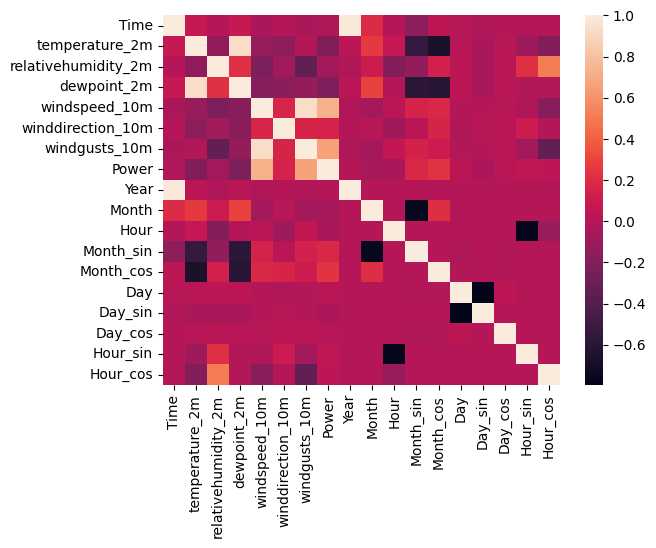

In [13]:
sns.heatmap(corr)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf4 = RandomForestRegressor(max_depth = 30, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300, random_state=42)
X_dropped = loc1_100m_dropped2.drop(columns=["Power", "Time","Day","Year","Month","Hour"])
y_dropped = loc1_100m_dropped2["Power"]

X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)
rf4.fit(X_train, y_train)

y_pred = rf4.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae,mse,rmse,r2)

0.10005868221640853 0.01850486453275029 0.1360325862900147 0.7763829627306331


In [15]:
X_test.columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'winddirection_10m', 'windgusts_10m', 'Month_sin', 'Month_cos',
       'Day_sin', 'Day_cos', 'Hour_sin', 'Hour_cos'],
      dtype='object')

In [16]:
pred_values = pd.DataFrame({"Value":y_test, "Pred":y_pred, "Error":y_test-y_pred})

In [17]:
pred_values

,Value,Pred,Error
28101,0.2914,0.321403,-0.030003
25482,0.0854,0.133204,-0.047804
19891,0.3951,0.428177,-0.033077
43029,0.0917,0.245512,-0.153812
40286,0.0007,0.034591,-0.033891
...,...,...,...
36067,0.3432,0.260869,0.082331
43757,0.0632,0.194604,-0.131404
21611,0.1110,0.261234,-0.150234
21928,0.0949,0.266563,-0.171663


In [18]:
pred_values["Date"] = X_test['Day_cos']

In [19]:
pred_values

,Value,Pred,Error,Date
28101,0.2914,0.321403,-0.030003,-0.954139
25482,0.0854,0.133204,-0.047804,0.918958
19891,0.3951,0.428177,-0.033077,-0.440394
43029,0.0917,0.245512,-0.153812,0.918958
40286,0.0007,0.034591,-0.033891,0.151428
...,...,...,...,...
36067,0.3432,0.260869,0.082331,-0.758758
43757,0.0632,0.194604,-0.131404,0.979530
21611,0.1110,0.261234,-0.150234,-0.440394
21928,0.0949,0.266563,-0.171663,0.688967


<Axes: xlabel='Date', ylabel='Value'>

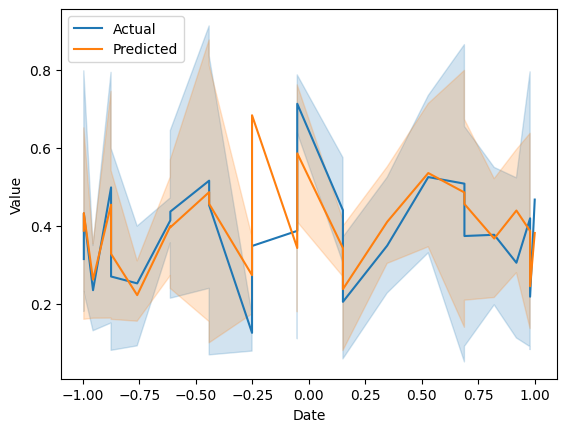

In [20]:
sns.lineplot(x=pred_values['Date'][:100], y=pred_values['Value'][:100], label="Actual")

sns.lineplot(x=pred_values['Date'][:100], y=pred_values['Pred'][:100], label="Predicted")

In [21]:
import pickle

# Save the model to a specific folder (e.g., 'models/')
model_path = "random_forest_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(rf4, f)

In [22]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 51.5085,
    "longitude": -0.1257,
    "hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m"],
    "temperature_unit": "fahrenheit",
    "wind_speed_unit": "ms",
    "timezone": "auto",
    "forecast_days": 7
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(3).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(5).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)

# Save to CSV
csv_filename = "london_hourly_weather.csv"
hourly_dataframe.to_csv(csv_filename, index=False)
print(f"CSV saved: {csv_filename}")

print(hourly_dataframe)

Coordinates 51.5°N -0.12000012397766113°E
Elevation 23.0 m asl
Timezone b'Europe/London' None
Timezone difference to GMT+0 0 s
CSV saved: london_hourly_weather.csv
                         date  temperature_2m  relative_humidity_2m  \
0   2025-02-12 00:00:00+00:00       39.803001                  86.0   
1   2025-02-12 01:00:00+00:00       39.623001                  85.0   
2   2025-02-12 02:00:00+00:00       39.263000                  85.0   
3   2025-02-12 03:00:00+00:00       38.813000                  81.0   
4   2025-02-12 04:00:00+00:00       38.362999                  83.0   
..                        ...             ...                   ...   
163 2025-02-18 19:00:00+00:00       48.935303                  89.0   
164 2025-02-18 20:00:00+00:00       48.755302                  89.0   
165 2025-02-18 21:00:00+00:00       48.575298                  90.0   
166 2025-02-18 22:00:00+00:00       48.395302                  91.0   
167 2025-02-18 23:00:00+00:00       48.395302          

In [23]:
import pandas as pd
fut_df = pd.read_csv(csv_filename)

In [24]:
fut_df.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m
0,2025-02-12 00:00:00+00:00,39.803,86.0,35.958160,1.300000,360.000000,3.1
1,2025-02-12 01:00:00+00:00,39.623,85.0,35.486107,2.109502,5.440250,4.4
2,2025-02-12 02:00:00+00:00,39.263,85.0,35.132763,2.668333,12.994630,5.7
3,2025-02-12 03:00:00+00:00,38.813,81.0,33.483208,2.102380,25.346138,5.8
4,2025-02-12 04:00:00+00:00,38.363,83.0,33.653095,1.552418,14.931467,4.6


In [25]:
fut_df.rename(columns={'date': 'Time'}, inplace=True)
fut_df['Time'] = pd.to_datetime(fut_df['Time'])
fut_df['Year']=fut_df['Time'].dt.year
fut_df['Month']=fut_df['Time'].dt.month

In [26]:
fut_df['Hour'] = fut_df['Time'].dt.hour

In [27]:
fut_df

,Time,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,Year,Month,Hour
0,2025-02-12 00:00:00+00:00,39.803000,86.0,35.958160,1.300000,360.000000,3.1,2025,2,0
1,2025-02-12 01:00:00+00:00,39.623000,85.0,35.486107,2.109502,5.440250,4.4,2025,2,1
2,2025-02-12 02:00:00+00:00,39.263000,85.0,35.132763,2.668333,12.994630,5.7,2025,2,2
3,2025-02-12 03:00:00+00:00,38.813000,81.0,33.483208,2.102380,25.346138,5.8,2025,2,3
4,2025-02-12 04:00:00+00:00,38.363000,83.0,33.653095,1.552418,14.931467,4.6,2025,2,4
...,...,...,...,...,...,...,...,...,...,...
163,2025-02-18 19:00:00+00:00,48.935303,89.0,45.835808,2.459675,116.564990,5.4,2025,2,19
164,2025-02-18 20:00:00+00:00,48.755302,89.0,45.658257,2.332381,120.963690,5.4,2025,2,20
165,2025-02-18 21:00:00+00:00,48.575300,90.0,45.775578,2.302173,124.380400,5.3,2025,2,21
166,2025-02-18 22:00:00+00:00,48.395300,91.0,45.889565,2.280351,127.875046,5.2,2025,2,22


In [28]:
import numpy as np
min_year = fut_df['Year'].min()
max_year = fut_df['Year'].max()
fut_df['Month_sin'] = np.sin(2 * np.pi * fut_df['Month'] / 12)
fut_df['Month_cos'] = np.cos(2 * np.pi * fut_df['Month'] / 12)

In [29]:
fut_df['Day'] = fut_df['Time'].dt.day
fut_df['Day_sin'] = np.sin(2 * np.pi * fut_df['Day'] / 31) 
fut_df['Day_cos'] = np.cos(2 * np.pi * fut_df['Day'] / 31)
fut_df['Hour_sin'] = np.sin(2 * np.pi * fut_df['Hour'] / 24) 
fut_df['Hour_cos'] = np.cos(2 * np.pi * fut_df['Hour'] / 24)

In [30]:
fut_df.head()

,Time,temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,Year,Month,Hour,Month_sin,Month_cos,Day,Day_sin,Day_cos,Hour_sin,Hour_cos
0,2025-02-12 00:00:00+00:00,39.803,86.0,35.958160,1.300000,360.000000,3.1,2025,2,0,0.866025,0.5,12,0.651372,-0.758758,0.000000,1.000000
1,2025-02-12 01:00:00+00:00,39.623,85.0,35.486107,2.109502,5.440250,4.4,2025,2,1,0.866025,0.5,12,0.651372,-0.758758,0.258819,0.965926
2,2025-02-12 02:00:00+00:00,39.263,85.0,35.132763,2.668333,12.994630,5.7,2025,2,2,0.866025,0.5,12,0.651372,-0.758758,0.500000,0.866025
3,2025-02-12 03:00:00+00:00,38.813,81.0,33.483208,2.102380,25.346138,5.8,2025,2,3,0.866025,0.5,12,0.651372,-0.758758,0.707107,0.707107
4,2025-02-12 04:00:00+00:00,38.363,83.0,33.653095,1.552418,14.931467,4.6,2025,2,4,0.866025,0.5,12,0.651372,-0.758758,0.866025,0.500000


In [31]:
fut_df.rename(columns={"relative_humidity_2m":"relativehumidity_2m", "dew_point_2m":"dewpoint_2m", "wind_speed_10m":"windspeed_10m", "wind_direction_10m":"winddirection_10m", "wind_gusts_10m":"windgusts_10m"}, inplace=True)

In [32]:
pred_df = fut_df.drop(columns=["Time","Day","Year","Month","Hour"])
y_pred = rf4.predict(pred_df)

In [33]:
y_pred

array([0.22573046, 0.21528667, 0.237833  , 0.2798608 , 0.22953198,
       0.15369581, 0.13865723, 0.14615342, 0.14828297, 0.14306806,
       0.14205706, 0.14144658, 0.16560519, 0.15022129, 0.14375369,
       0.16087322, 0.15788533, 0.1729342 , 0.17937467, 0.20005167,
       0.20243433, 0.21273833, 0.25197138, 0.22093633, 0.23279067,
       0.22078067, 0.24526667, 0.20761333, 0.2312406 , 0.312612  ,
       0.29051833, 0.22082067, 0.15820625, 0.17794918, 0.14068433,
       0.12967002, 0.17667733, 0.14269136, 0.138679  , 0.19797233,
       0.17155   , 0.12679336, 0.30601667, 0.287935  , 0.213274  ,
       0.205842  , 0.19863021, 0.184472  , 0.19395311, 0.17403681,
       0.16412787, 0.1444022 , 0.13892873, 0.13537497, 0.14702527,
       0.14599891, 0.14454597, 0.11865096, 0.09928921, 0.13023042,
       0.16677533, 0.28812   , 0.34933767, 0.345504  , 0.39765267,
       0.414306  , 0.217201  , 0.16357033, 0.19682633, 0.18393033,
       0.16698342, 0.29538603, 0.26305567, 0.23057411, 0.17450

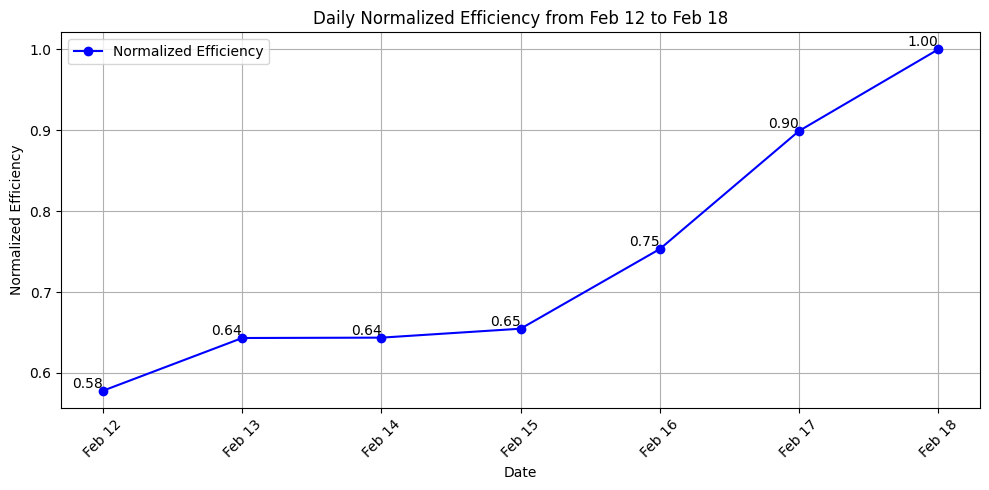

'normalized_efficiency_plot.png'

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

efficiency_values = y_pred

daily_efficiency = efficiency_values.reshape(-1, 24).sum(axis=1)
normalized_efficiency = daily_efficiency / daily_efficiency.max()  # Normalize

# Get the current date and generate dates dynamically
start_date = datetime.today()
dates = [(start_date + timedelta(days=i)).strftime("%b %d") for i in range(7)]

plt.figure(figsize=(10, 5))
plt.plot(dates, normalized_efficiency, marker='o', linestyle='-', color='b', label="Normalized Efficiency")

for i, txt in enumerate(normalized_efficiency):
    plt.text(dates[i], normalized_efficiency[i], f"{txt:.2f}", ha='right', va='bottom', fontsize=10)

plt.xlabel("Date")
plt.ylabel("Normalized Efficiency")
plt.title(f"Daily Normalized Efficiency from {dates[0]} to {dates[-1]}")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
image_path = "normalized_efficiency_plot.png"
plt.savefig(image_path, dpi=300)
plt.show()

image_path  


In [35]:
df_efficiency = pd.DataFrame({
    "Date": dates,
    "Normalized_Efficiency": normalized_efficiency
})

# Save to CSV
csv_path = "efficiency_data.csv"
df_efficiency.to_csv(csv_path, index=False)

# Display the table
print(df_efficiency)

csv_path

     Date  Normalized_Efficiency
0  Feb 12               0.577988
1  Feb 13               0.643144
2  Feb 14               0.643598
3  Feb 15               0.654655
4  Feb 16               0.753184
5  Feb 17               0.899176
6  Feb 18               1.000000


'efficiency_data.csv'